# TALLER de preprocesamiento de datos y reducción de dimensionalidad

### Aprendizaje de maquina
#### Jonh Wiliam Branch

### Problema de compañia celular

Juan ha comenzado su propia compañía de telefonía móvil. Quiere dar una pelea dura a grandes compañías como Apple, Samsung, etc.

No sabe cómo estimar el precio de los móviles que crea su empresa en este mercado competitivo de teléfonos móviles, no puede simplemente asumir las cosas. Para resolver este problema, recopila datos de ventas de teléfonos móviles de varias compañías.

Juan quiere descubrir alguna relación entre las características de un teléfono móvil (por ejemplo: RAM, memoria interna, wifi etc.) y su precio de venta (price_range). Pero él no es tan bueno en Machine Learning. Entonces necesita tu ayuda para resolver este problema.

En este problema el rango de precios indica qué tan alto es el precio. 

Ayuda a Juan a mirar las caracteristicas representantivas de la base de datos con el precio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

##### Se llaman las dos base de datos que tenemos

In [2]:
#load data
data1 = pd.read_csv("datos1.csv")

#load data
data2 = pd.read_csv("datos2.csv")

##### Se miran las dos bases de datos




In [3]:
# se mira la base de datos1
data1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1981,1,1.9,1,13,0,45,0.3,175,6,...,193,1234,1380,10,1,13,0,1,0,1
1,614,0,1.7,1,0,1,58,0.2,128,7,...,22,519,3487,15,6,11,1,1,1,2
2,1590,0,0.6,1,0,0,7,0.3,122,3,...,1464,1595,1201,12,3,18,1,1,1,1
3,1945,0,1.6,0,4,0,21,0.7,113,3,...,280,895,3015,6,1,15,0,0,0,3
4,1135,1,2.8,1,9,0,43,0.4,158,1,...,690,1589,3204,18,13,6,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1271,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1272,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1273,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
#se mira la base de datos2
data2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188.0,2.0,...,20,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136.0,3.0,...,905,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145.0,5.0,...,1263,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131.0,6.0,...,1216,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141.0,2.0,...,1208,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1702,1,2.3,0,12,1,52,0.5,145.0,2.0,...,1397,1491.0,2501.0,16.0,12.0,4,1,0,0,3
763,808,0,0.5,1,0,0,8,0.1,192.0,4.0,...,618,1891.0,3762.0,15.0,9.0,12,1,0,1,3
764,1156,0,0.5,0,6,0,61,0.1,89.0,7.0,...,1214,1262.0,1796.0,16.0,6.0,13,0,1,1,1
765,1271,0,0.5,1,2,0,54,0.1,159.0,8.0,...,613,650.0,990.0,14.0,11.0,6,0,1,1,0


###### Se une las dos base de datos a una SOLa

Como tenemos las mismas columnas en las dos base de datos, optamos por unir las dos bases de datos para que nos quede solamente una.

Con la funcion .concat se unen dos base de datos.  

Y para colocar una base de datos encima de la otra (Vertical) en axis se coloca valor de cero(0) y para colocar una base de datos una al lado de la otra (horizontal) se pone axis valor 1



In [6]:
##se Unen las dos base de datos

data = pd.concat([ data1, data2 ], axis= 0 )


In [7]:
# Llamamos la base de datos unida
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1981,1,1.9,1,13,0,45,0.3,175.0,6.0,...,193,1234.0,1380.0,10.0,1.0,13,0,1,0,1
1,614,0,1.7,1,0,1,58,0.2,128.0,7.0,...,22,519.0,3487.0,15.0,6.0,11,1,1,1,2
2,1590,0,0.6,1,0,0,7,0.3,122.0,3.0,...,1464,1595.0,1201.0,12.0,3.0,18,1,1,1,1
3,1945,0,1.6,0,4,0,21,0.7,113.0,3.0,...,280,895.0,3015.0,6.0,1.0,15,0,0,0,3
4,1135,1,2.8,1,9,0,43,0.4,158.0,1.0,...,690,1589.0,3204.0,18.0,13.0,6,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1702,1,2.3,0,12,1,52,0.5,145.0,2.0,...,1397,1491.0,2501.0,16.0,12.0,4,1,0,0,3
763,808,0,0.5,1,0,0,8,0.1,192.0,4.0,...,618,1891.0,3762.0,15.0,9.0,12,1,0,1,3
764,1156,0,0.5,0,6,0,61,0.1,89.0,7.0,...,1214,1262.0,1796.0,16.0,6.0,13,0,1,1,1
765,1271,0,0.5,1,2,0,54,0.1,159.0,8.0,...,613,650.0,990.0,14.0,11.0,6,0,1,1,0


#### Miramos si tenemos datos nulos


In [11]:
# ingrese el codigo para ver la cantidad de datos nulos por variables(columna)
data.isna().sum()

battery_power     0
blue              0
clock_speed       0
dual_sim          0
fc                0
four_g            0
int_memory        0
m_dep            18
mobile_wt         9
n_cores          13
pc                1
px_height         0
px_width         19
ram              31
sc_h             40
sc_w             22
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

##### ELiminar datos nulos

el cliente quiere que todas las filas de datos nulos sean eliminadas

In [12]:
### ELiminamos los datos nulos de la base de datos y creamos una nueva base de datos llamada "data"

data = data.dropna()

In [13]:
###volvemos a mirar si hay datos nulos
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
### Imprimir el tamaño (shape) de la base datos nueva
data.shape

(2000, 21)

In [15]:
# Imprimir las columnas del dataframe de la base datos nueva
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

#### Resumen estadistico

In [16]:
## Obtener el Resumen estadistico en una tabla

data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [15]:
# Imprimir el tamaño (shape)
data.shape

(2000, 21)

In [18]:
# Filtrar la base de datos (data) donde 
## price_range = 3   ,   battery_power > 1500   ,    int_memory > 16
data[(data['price_range'] == 3) & (data['battery_power'] > 1500) & (data['int_memory'] > 16)]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
3,1945,0,1.6,0,4,0,21,0.7,113.0,3.0,...,280,895.0,3015.0,6.0,1.0,15,0,0,0,3
16,1972,0,1.2,1,0,0,37,0.7,102.0,2.0,...,715,1648.0,2870.0,16.0,0.0,17,0,0,0,3
21,1884,0,2.1,1,7,1,43,0.8,185.0,1.0,...,451,819.0,3619.0,14.0,8.0,7,1,1,1,3
45,1911,1,2.0,0,7,1,64,0.6,163.0,8.0,...,1795,1958.0,3872.0,9.0,8.0,11,1,1,0,3
52,1786,0,0.5,0,9,1,58,0.7,161.0,7.0,...,231,1671.0,2764.0,9.0,3.0,7,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,1836,1,2.1,1,0,1,30,0.2,184.0,7.0,...,276,1230.0,3072.0,7.0,3.0,5,1,1,0,3
700,1926,1,1.1,0,13,1,50,0.2,179.0,6.0,...,371,1000.0,3809.0,17.0,12.0,17,1,1,0,3
743,1717,1,1.3,0,1,0,62,0.7,130.0,1.0,...,609,810.0,3226.0,6.0,4.0,5,0,1,0,3
749,1591,1,2.2,0,3,1,49,0.4,154.0,6.0,...,1384,1883.0,3703.0,17.0,6.0,20,1,1,0,3


   ### Mapa de correlación

La correlación establece cómo se relacionan las características entre sí o con la variable de destino.
La correlación puede ser positiva (el aumento en un valor de la característica aumenta el valor de la variable objetivo) o negativa (el aumento en un valor de la característica disminuye el valor de la variable objetivo)
El mapa de calor hace que sea fácil identificar qué características están más relacionadas con la variable objetivo, trazaremos un mapa de calor de las funciones correlacionadas

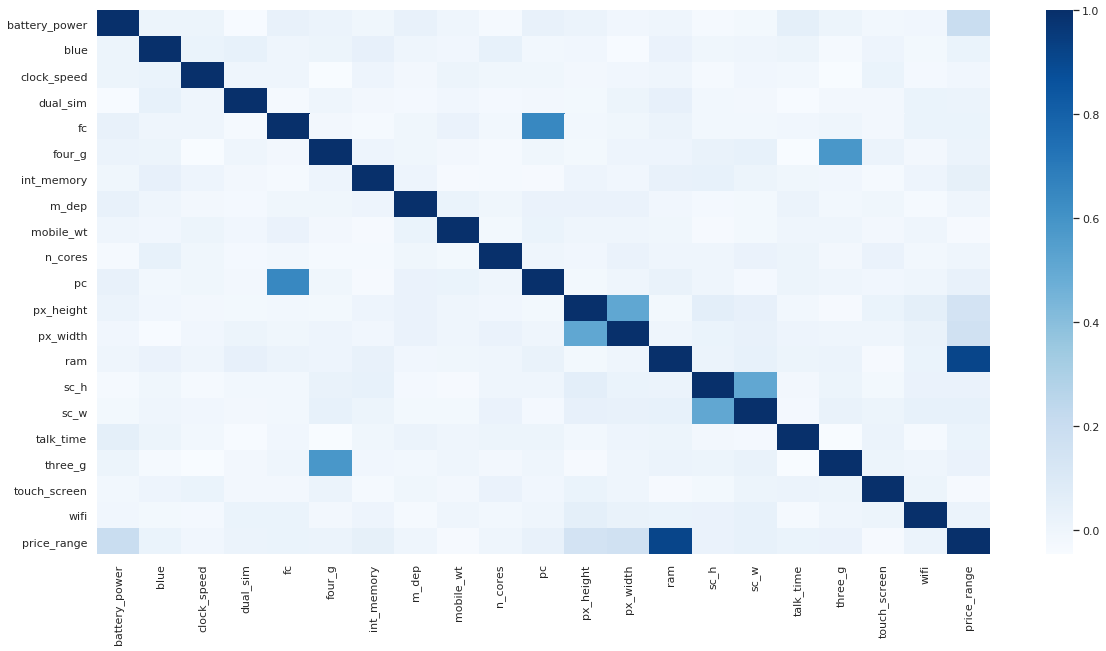

In [19]:
# Matriz de correlacion entre atributos

corr = data.corr()
fig, (ax) = plt.subplots(1,1,sharey = True, figsize = (20,10))
sns.heatmap(corr, cmap = 'Blues')

# Selección de atributos (Feature selection)

In [20]:
data = data

In [21]:
# extraemos primero las columnas indempendientes y la dependiente de la base de datos (data) para el tratamiento en feature selection

X = data.iloc[:,0:20]  #Columnas Independientes 
y = data.iloc[:,-1]    #Columna dependiente (clase) price range

## 1. Selección univariante

Las pruebas estadísticas se pueden usar para seleccionar aquellas características que tienen la relación más fuerte con la variable de salida.

La biblioteca scikit-learn proporciona la clase SelectKBest que se puede usar con un conjunto de diferentes pruebas estadísticas para seleccionar un número específico de características.

El siguiente ejemplo utiliza la prueba estadística de chi-cuadrado (chi²)  para seleccionar las 10 mejores características del conjunto de datos.

### Feature Selection Based on KBest method (Filter Method)

In [24]:
## Se importa las librerias
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [25]:
# aplique  SelectKBest para extraer las 10 mejores características principales con chi2


bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


In [27]:
##concat dos marcos de datos para una mejor visualización 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['variables','puntuacion']  # se nombra las dos columnas con los nombres y su puntuacion


print(featureScores.nlargest(10,'puntuacion'))  # IMprime las 10 mejores caractericticas y tambien pruebe con 4

        variables     puntuacion
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


### 2. Caracteristicas importantes basados en arbol de clasificación

La importancia de la característica le da una puntuación para cada característica de sus datos, cuanto mayor sea la puntuación más importante o relevante es la característica hacia su variable de salida.

La importancia de la característica es una funcion incorporada que viene con los Clasificadores basados en árboles.

Usaremos el Clasificador de árbol para extraer las 10 características principales para el conjunto de datos.

In [28]:
# Se llama las librerias
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt

In [29]:
# se llama el modelo de arbol
model = ExtraTreesClassifier()

## Modelo con mis datos de la variable dependiente y las independientes
model.fit(X,y)

# Caracteristicas importantes en base al arbol de clasificacion
print(model.feature_importances_) 





[0.05984443 0.02014705 0.03262689 0.01914074 0.0325953  0.01699903
 0.03475425 0.032684   0.03584127 0.03352333 0.03327903 0.04692838
 0.04946371 0.39648001 0.03470978 0.03391382 0.03428748 0.01438376
 0.01796856 0.0204292 ]


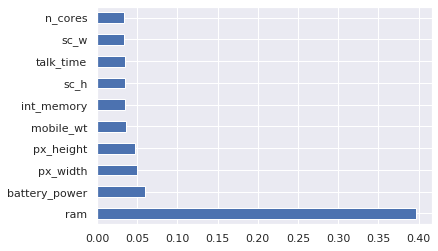

In [30]:
# gráfico de las características importantes para una mejor visualización
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [31]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1981,1,1.9,1,13,0,45,0.3,175.0,6.0,...,193,1234.0,1380.0,10.0,1.0,13,0,1,0,1
1,614,0,1.7,1,0,1,58,0.2,128.0,7.0,...,22,519.0,3487.0,15.0,6.0,11,1,1,1,2
2,1590,0,0.6,1,0,0,7,0.3,122.0,3.0,...,1464,1595.0,1201.0,12.0,3.0,18,1,1,1,1
3,1945,0,1.6,0,4,0,21,0.7,113.0,3.0,...,280,895.0,3015.0,6.0,1.0,15,0,0,0,3
4,1135,1,2.8,1,9,0,43,0.4,158.0,1.0,...,690,1589.0,3204.0,18.0,13.0,6,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1702,1,2.3,0,12,1,52,0.5,145.0,2.0,...,1397,1491.0,2501.0,16.0,12.0,4,1,0,0,3
763,808,0,0.5,1,0,0,8,0.1,192.0,4.0,...,618,1891.0,3762.0,15.0,9.0,12,1,0,1,3
764,1156,0,0.5,0,6,0,61,0.1,89.0,7.0,...,1214,1262.0,1796.0,16.0,6.0,13,0,1,1,1
765,1271,0,0.5,1,2,0,54,0.1,159.0,8.0,...,613,650.0,990.0,14.0,11.0,6,0,1,1,0


####  Caracteristicas importantes basadas en RandomForestClassifier

In [32]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=10, scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])


Optimal number of features : 5
Best features : Index(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram'], dtype='object')


In [33]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1981,1,1.9,1,13,0,45,0.3,175.0,6.0,...,193,1234.0,1380.0,10.0,1.0,13,0,1,0,1
1,614,0,1.7,1,0,1,58,0.2,128.0,7.0,...,22,519.0,3487.0,15.0,6.0,11,1,1,1,2
2,1590,0,0.6,1,0,0,7,0.3,122.0,3.0,...,1464,1595.0,1201.0,12.0,3.0,18,1,1,1,1
3,1945,0,1.6,0,4,0,21,0.7,113.0,3.0,...,280,895.0,3015.0,6.0,1.0,15,0,0,0,3
4,1135,1,2.8,1,9,0,43,0.4,158.0,1.0,...,690,1589.0,3204.0,18.0,13.0,6,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1702,1,2.3,0,12,1,52,0.5,145.0,2.0,...,1397,1491.0,2501.0,16.0,12.0,4,1,0,0,3
763,808,0,0.5,1,0,0,8,0.1,192.0,4.0,...,618,1891.0,3762.0,15.0,9.0,12,1,0,1,3
764,1156,0,0.5,0,6,0,61,0.1,89.0,7.0,...,1214,1262.0,1796.0,16.0,6.0,13,0,1,1,1
765,1271,0,0.5,1,2,0,54,0.1,159.0,8.0,...,613,650.0,990.0,14.0,11.0,6,0,1,1,0


### PCA

In [34]:
#Aplicamos una transformación de los datos para poder aplicar las propiedades de la distribución normal

from sklearn.preprocessing import StandardScaler


X_std = StandardScaler().fit_transform(X)

In [35]:
# Calculamos la matriz de covarianza 

print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[ 1.00050025e+00  1.12572524e-02  1.14873374e-02 -4.18677837e-02
   3.33510605e-02  1.56723908e-02 -4.00568275e-03  3.41015657e-02
   1.84529886e-03 -2.97421300e-02  3.14564054e-02  1.49082587e-02
  -8.40603352e-03 -6.53253073e-04 -2.99735883e-02 -2.14316591e-02
   5.25366230e-02  1.15279324e-02 -1.05210959e-02 -8.34710239e-03]
 [ 1.12572524e-02  1.00050025e+00  2.14294077e-02  3.52157213e-02
   3.59499855e-03  1.34498304e-02  4.11977679e-02  4.05121914e-03
  -8.60894730e-03  3.61788084e-02 -9.95715087e-03 -6.87582838e-03
  -4.15542189e-02  2.63641190e-02 -2.95376944e-03  6.13382341e-04
   1.39406207e-02 -3.02513106e-02  1.00657170e-02 -2.18741729e-02]
 [ 1.14873374e-02  2.14294077e-02  1.00050025e+00 -1.31586196e-03
  -4.34115265e-04 -4.30949029e-02  6.54841936e-03 -1.43715461e-02
   1.23559258e-02 -5.72708958e-03 -5.24766139e-03 -1.45301602e-02
  -9.48039325e-03  3.44475306e-03 -2.90921679e-02 -7.38204657e-03
  -1.14375844e-02 -4.64567253e-02  1.97656888e-0

In [36]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos

### agregue la X_std.T
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)    # AUtovectores
print('\nEigenvalues \n%s' %eig_vals)   # Autovalores

Eigenvectors 
[[ 7.60743471e-02  3.22473054e-02 -2.02286755e-02  8.12732363e-02
   1.18443650e-03 -5.89536150e-03 -3.40377185e-02  7.02834404e-03
  -4.01205073e-01 -3.56340509e-01 -2.32916261e-01 -2.80684248e-01
   1.97562786e-01 -5.94363225e-02 -1.22272801e-01  3.75559985e-01
  -4.99432466e-01 -1.99609721e-01  2.75792461e-01  6.20189219e-03]
 [ 9.23777150e-03 -3.44118882e-02 -3.44078066e-02 -7.04018233e-02
   1.97892030e-02 -4.96326627e-02 -4.53709622e-02  3.10136660e-02
   1.78366313e-02  3.96528422e-01 -8.51827485e-02 -4.66640324e-01
  -4.66597229e-01 -1.36138416e-01  1.50364664e-01 -2.57216537e-02
  -3.47308369e-01  3.76601052e-01  4.74616784e-02  2.82720202e-01]
 [ 4.69247357e-02 -9.70373015e-02  3.65331722e-03 -2.93356324e-02
   1.87477945e-03 -3.03531515e-03 -5.70868138e-03 -3.40608614e-02
  -8.47011040e-03  6.74024938e-02  3.86052684e-01 -7.98732067e-02
  -1.60769909e-01 -7.80159323e-01 -4.96500929e-02  1.27726118e-01
   3.32808045e-02 -3.18945388e-01 -8.69398941e-02 -2.5020843

In [37]:
#  Hacemos una lista de parejas (autovector, autovalor) 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
1.6780966902512855
1.6233065902453556
1.5833625315679933
1.4297598696238103
1.122072122152164
1.0876802238930448
1.0661773062852264
1.0209287651434078
1.0175506031849861
1.0061884454504089
0.9812144042687277
0.9753196902298907
0.952714791873613
0.9521252947555466
0.8992832262441529
0.8765573435008642
0.5010548773898144
0.4725359563906835
0.4130448331265244
0.3510314369237404


In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

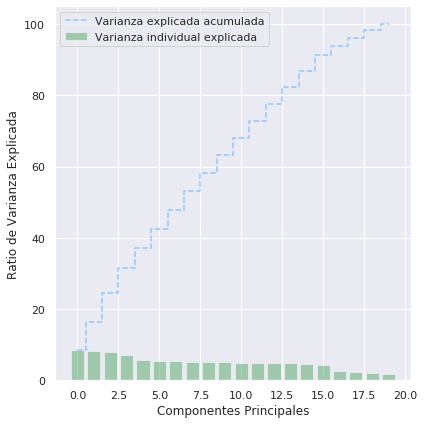

In [39]:
# A partir de los autovalores, calculamos la varianza explicada

#### Agregue Autovalores
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 6))

    plt.bar(range(20), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(20), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

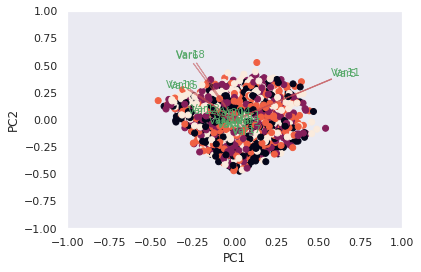

In [40]:
### Se grafica las dos componentes principales PC1 y PC2 


scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    

pca = PCA()
x_new = pca.fit_transform(X)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Llama a la función. Use solo las 2 PC.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

# 1.Extracción manual de características

In [41]:
data =data
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1981,1,1.9,1,13,0,45,0.3,175.0,6.0,...,193,1234.0,1380.0,10.0,1.0,13,0,1,0,1
1,614,0,1.7,1,0,1,58,0.2,128.0,7.0,...,22,519.0,3487.0,15.0,6.0,11,1,1,1,2
2,1590,0,0.6,1,0,0,7,0.3,122.0,3.0,...,1464,1595.0,1201.0,12.0,3.0,18,1,1,1,1
3,1945,0,1.6,0,4,0,21,0.7,113.0,3.0,...,280,895.0,3015.0,6.0,1.0,15,0,0,0,3
4,1135,1,2.8,1,9,0,43,0.4,158.0,1.0,...,690,1589.0,3204.0,18.0,13.0,6,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1702,1,2.3,0,12,1,52,0.5,145.0,2.0,...,1397,1491.0,2501.0,16.0,12.0,4,1,0,0,3
763,808,0,0.5,1,0,0,8,0.1,192.0,4.0,...,618,1891.0,3762.0,15.0,9.0,12,1,0,1,3
764,1156,0,0.5,0,6,0,61,0.1,89.0,7.0,...,1214,1262.0,1796.0,16.0,6.0,13,0,1,1,1
765,1271,0,0.5,1,2,0,54,0.1,159.0,8.0,...,613,650.0,990.0,14.0,11.0,6,0,1,1,0


Se desea calcular el area de la pantalla para la duración de la bateria.

Calcule el area de la pantalla producto a partir de la altura (px_height) y del ancho (px_width).

In [42]:
# Calcula el area de la pantalla
data['area'] = data['px_height'] * data['px_width']
print("data",data.shape)

data (2000, 22)


/home/mateo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
###Imprimir data para ver al final la columna "area"
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,area
0,1981,1,1.9,1,13,0,45,0.3,175.0,6.0,...,1234.0,1380.0,10.0,1.0,13,0,1,0,1,238162.0
1,614,0,1.7,1,0,1,58,0.2,128.0,7.0,...,519.0,3487.0,15.0,6.0,11,1,1,1,2,11418.0
2,1590,0,0.6,1,0,0,7,0.3,122.0,3.0,...,1595.0,1201.0,12.0,3.0,18,1,1,1,1,2335080.0
3,1945,0,1.6,0,4,0,21,0.7,113.0,3.0,...,895.0,3015.0,6.0,1.0,15,0,0,0,3,250600.0
4,1135,1,2.8,1,9,0,43,0.4,158.0,1.0,...,1589.0,3204.0,18.0,13.0,6,1,0,0,3,1096410.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1702,1,2.3,0,12,1,52,0.5,145.0,2.0,...,1491.0,2501.0,16.0,12.0,4,1,0,0,3,2082927.0
763,808,0,0.5,1,0,0,8,0.1,192.0,4.0,...,1891.0,3762.0,15.0,9.0,12,1,0,1,3,1168638.0
764,1156,0,0.5,0,6,0,61,0.1,89.0,7.0,...,1262.0,1796.0,16.0,6.0,13,0,1,1,1,1532068.0
765,1271,0,0.5,1,2,0,54,0.1,159.0,8.0,...,650.0,990.0,14.0,11.0,6,0,1,1,0,398450.0


Descarte las características altura (px_height) y del ancho (px_width). del conjunto de datos.

In [44]:
# Descarte las características altura (px_height) y del ancho (px_width).
reduced_data = data.drop(["px_height", "px_width"], axis=1)

## Imprima la nueva base de datos (reduced_data)
reduced_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,area
0,1981,1,1.9,1,13,0,45,0.3,175.0,6.0,18.0,1380.0,10.0,1.0,13,0,1,0,1,238162.0
1,614,0,1.7,1,0,1,58,0.2,128.0,7.0,2.0,3487.0,15.0,6.0,11,1,1,1,2,11418.0
2,1590,0,0.6,1,0,0,7,0.3,122.0,3.0,17.0,1201.0,12.0,3.0,18,1,1,1,1,2335080.0
3,1945,0,1.6,0,4,0,21,0.7,113.0,3.0,10.0,3015.0,6.0,1.0,15,0,0,0,3,250600.0
4,1135,1,2.8,1,9,0,43,0.4,158.0,1.0,11.0,3204.0,18.0,13.0,6,1,0,0,3,1096410.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,1702,1,2.3,0,12,1,52,0.5,145.0,2.0,15.0,2501.0,16.0,12.0,4,1,0,0,3,2082927.0
763,808,0,0.5,1,0,0,8,0.1,192.0,4.0,1.0,3762.0,15.0,9.0,12,1,0,1,3,1168638.0
764,1156,0,0.5,0,6,0,61,0.1,89.0,7.0,9.0,1796.0,16.0,6.0,13,0,1,1,1,1532068.0
765,1271,0,0.5,1,2,0,54,0.1,159.0,8.0,3.0,990.0,14.0,11.0,6,0,1,1,0,398450.0


# Conclusiones

#### Escriba 4 conclusiones

- El primer paso cuando se trabaja con un conjunto de datos debe ser siempre la limpieza, pues en general, no sabemos a priori la calidad de los datos que se estan entregando. En este taller, por ejemplo se eliminaron las observaciones con datos nulos, para que estos no afectaran el analisis hecho posteriormente.
- Cuando se tiene un conjunto de datos con un numero considerable de caracteristicas es importante identificar cuales de estas son realmente importantes a la hora de trabajar con estos datos, si bien entre mas datos se tiene, mayor accuracy tendra un modelo estadistico entrenado sobre estos datos, la cantidad de datos tambien afecta el performance y muchas veces la mejora en accuracy al incluir caracteristicas no relevantes no es significativa.
- Existen casos en los que se puede reducir el número de caracteristicas de un conjunto de datos, agrupando varias caracteristicas en una o variar, cuya cantidad sera menor que el conjunto original. En este taller vimos un ejemplo de este caso: Combinar la altura y el ancho de la pantalla, en una sola variable llamada *area*, dado que la matriz de correlacion nos permitio identificar una relación entre estas dos variables.
- El analisis visual juega un papel fundamental a la hora de analizar un conjunto de datos, por eso es importante escoger los tipos de graficas que mayor información arrojen acerca de los datos. Existen muchas maneras de visualizar un conjunto de datos, y no siempre la misma visualizacion entrega la misma cantidad de información en cualquier conjunto de datos.
    